# Import Dependencies dan Load data

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Baca data ke dalam DataFrame
data = pd.read_csv("/content/diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Persiapan data
menggunakan shortening untuk memperpendek nama fitur

In [ ]:
X = data.drop('Outcome', axis=1)  # Ganti 'target_column' dengan nama kolom target Anda
y = data['Outcome']

shortening = {
    'DiabetesPedigreeFunction': 'Pedigree',
    'Pregnancies': 'Pregs',
    'BloodPressure': 'Pressure',
    'SkinThickness': 'SkinThick'
}

X_short = X.rename(columns=shortening)

X_train, X_test, y_train, y_test = train_test_split(X_short, y, test_size=0.2, random_state=42)


# Pembuatan Model

In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

# Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print(f'Sensitivitas: {recall}')
print(f'Presisi: {precision}')


Akurasi: 0.7922077922077922
Sensitivitas: 0.6363636363636364
Presisi: 0.7446808510638298


# Visualisasi


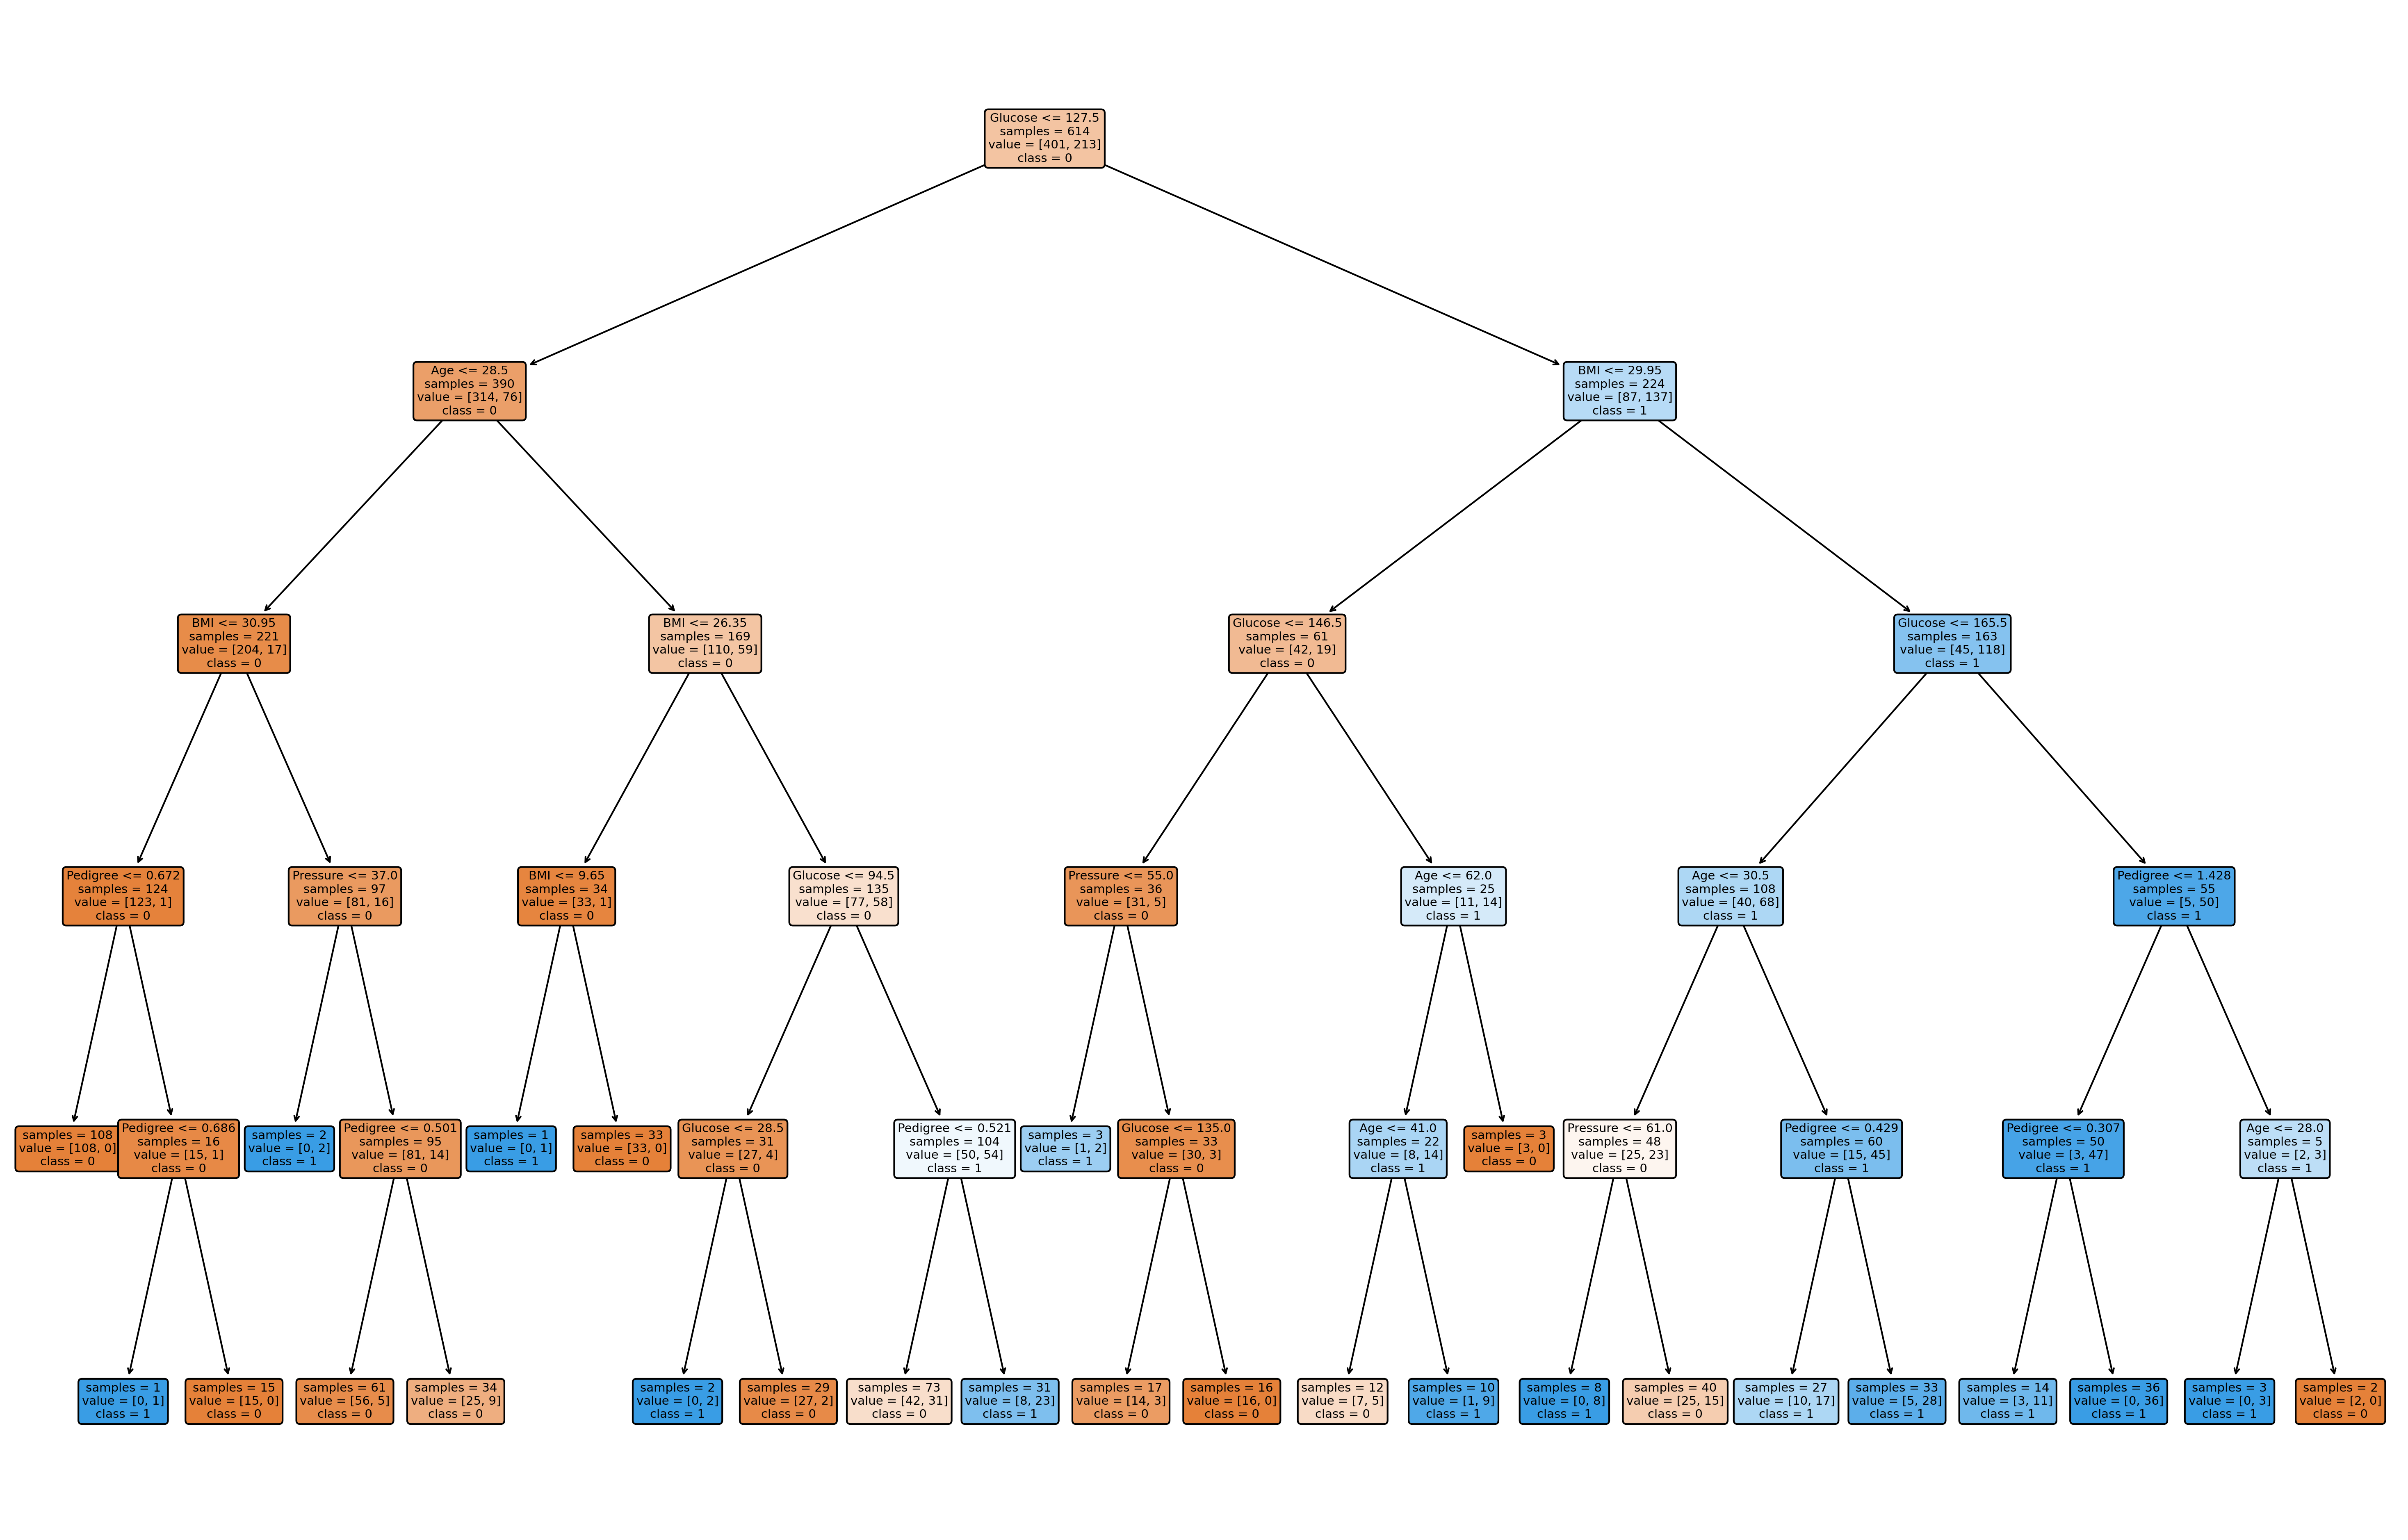

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 16), dpi=300)
plot_tree(model, feature_names=X_short.columns, class_names=['0', '1'], filled=True, fontsize=7, impurity=False, rounded=True)
plt.show()

In [ ]:
test = X_test[20:30]
predictions = model.predict(test)
test.loc[:,'True Results'] = y_test[20:30]
test.loc[:,'Predictions'] = predictions
test

<ipython-input-6-8fca2c3744ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'True Results'] = y_test[20:30]
<ipython-input-6-8fca2c3744ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'Predictions'] = predictions


,Pregs,Glucose,Pressure,SkinThick,Insulin,BMI,Pedigree,Age,True Results,Predictions
636,5,104,74,0,0,28.8,0.153,48,0,0
544,1,88,78,29,76,32.0,0.365,29,0,0
86,13,106,72,54,0,36.6,0.178,45,0,0
208,1,96,64,27,87,33.2,0.289,21,0,0
281,10,129,76,28,122,35.9,0.280,39,0,1
209,7,184,84,33,0,35.5,0.355,41,1,1
581,6,109,60,27,0,25.0,0.206,27,0,0
639,1,100,74,12,46,19.5,0.149,28,0,0
328,2,102,86,36,120,45.5,0.127,23,1,0
431,3,89,74,16,85,30.4,0.551,38,0,0
